# Animation Example

### Define library functions (go into separate file(s) later)

In [1]:
# Define all library functions (go into separate file later)

def download_turtle_image():
  '''
  This function should download a little image of a turtle into your current
  folder.  The turtle is used for our animations.

  Parameters
  ----------
  None

  Returns
  ------
  Downloads turtle image to current folder (i.e., present working directory)
  If there is a problem downloading, this function prints a message
  '''
  import subprocess
  import os
  result = subprocess.run(['curl -L "https://drive.google.com/uc?export=download&id=1LZBRk31Jan7yPgE44spPkxIK8rNc_dcU" > turtle.png;'], shell=True, capture_output=True)
  OK = os.path.isfile('./turtle.png')
  if(OK == False):
    print("Something went wrong with downloading turtle image")



Area of Room = 4.0


### Define line drawing, grid drawing, and maze drawing functions

In [2]:
def draw_line(ax, point1, point2, linestyle):
  '''
  Draw a line from point1 to point 2

  Parameters
  ----------
  ax : graphical/plotting axes, generated with
       fig, ax = plt.subplots()
  point1 : (x,y) pair   (technically called a tuple)
    Defines the first point for the line
  point1 : (x,y) pair   (technically called a tuple)
    Defines the second point for the line
  linestyle : 'light' or 'dark'
    Controls how dark and thick the line is

  Returns
  -------
  The plot corresponding to ax has a new line plotted in it
  '''
  if linestyle == 'light':
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], color=(0.6, 0.6, 0.6), linewidth=1)
  elif linestyle == 'dark':
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], color=(0.0, 0.0, 0.0), linewidth=3)
  else:
    print("No line drawn!  linestyle should be 'light' or 'dark' ")

def draw_grid(ax, nx, ny):
  '''
  Draw a background grid of size (nx, ny)

  Parameters
  ----------
  ax : graphical/plotting axes, generated with
       fig, ax = plt.subplots()

  nx : integer
    Number of squares in the grid horizontally (in the x-dimension)

  ny : integer
    Number of squares in the grid vertically (in the y-dimension)

  Returns
  -------
  The plot corresponding to ax has a background grid plotted on it
  '''
  import numpy as np

  # Plot all the vertical lines
  for i in np.arange(-0.5, nx, 1):
    point1 = (i, -0.5)
    point2 = (i, ny-0.5)
    draw_line(ax, point1, point2, 'light')

  # Plot all the horizontal lines
  for j in np.arange(-0.5, ny, 1):
    point1 = (-0.5, j)
    point2 = (nx-0.5, j)
    draw_line(ax, point1, point2, 'light')

def draw_maze(ax, line_segments):
  '''
  Draw maze defined by line_segments

  Parameters
  ----------
  ax : graphical/plotting axes, generated with
       fig, ax = plt.subplots()

  line_segments : list of line segments to define maze
    Each list element, line_segments[k], contains two pieces of information
    Let  seg = line_segments[k], then seg defines a line segment.
    We have  (x0,y0) = seg[0]  and  (x1,y1) = seg[1].
    A line segment is drawn from (x0,y0) --> (x1,y1)

  Returns
  -------
  The plot corresponding to ax has the maze plotted on it

  '''

  for seg in line_segments:
    point0 = seg[0]
    point1 = seg[1]
    draw_line(ax, point0, point1, 'dark')

def generate_maze1(ax):
  '''
  Draw Maze 1 using a stored design.  This simplest maze leads to the pond in a
  direct way.

  Parameters
  ----------
  ax : graphical/plotting axes, generated with
       fig, ax = plt.subplots()

  Returns
  -------
  The plot corresponding to ax has the maze plotted on it
  '''
  segs = []
  segs.append( ((-0.5,  -0.5),  (5.5,   -0.5)) )  # maze part 1
  segs.append( ((-0.5,   0.5),  (4.5,    0.5)) )
  segs.append( ((5.5,  -0.5),     (5.5,    5.5)) )  # maze part 2
  segs.append( ((4.5,   0.5),     (4.5,    6.5)) )
  segs.append( ((5.5,   5.5),     (12.5, 5.5)) ) # maze part 3
  segs.append( ((4.5,   6.5),     (11.5, 6.5)) )
  segs.append( ((12.5,  5.5),   (12.5,  11.5)) ) # maze part 4
  segs.append( ((11.5,  6.5),   (11.5,  11.5)) )
  draw_maze(ax, segs)

# insert maze 2, 3, 4, and so on...

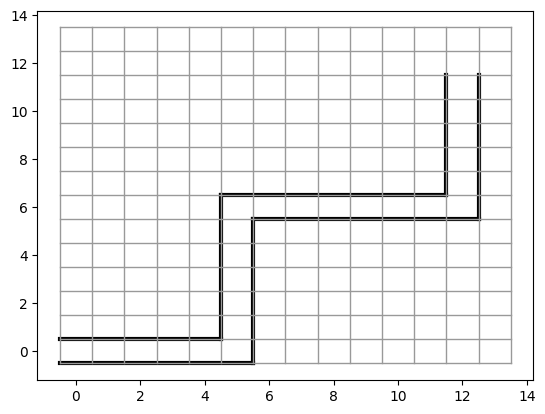

In [3]:
# Test code for verifying mazes

# with the turtle object, you'll want to re-import it, and then have a test-maze function that let's you pass in line segments and draw them

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
generate_maze1(ax)
draw_grid(ax, 14, 14)

### Define initialize and finalize animation functions

In [4]:
def initialize_animation():
    '''
    Initialize animation environment by setting options for matplotlib
    plotting environment

    Paramters
    --------
    None

    Returns
    --------
    None (Matplotlib environement modified behind the scenes)
    '''
    import matplotlib.pyplot as plt

    plt.rcParams['figure.dpi'] = 75
    plt.rcParams["animation.html"] = "jshtml" # javascript html writer
    plt.ioff() # Turn interactive mode off
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True

def finalize_animation(movement, pond=False, maze=None):
    '''
    Finalize and create animation

    Paramters
    --------
    movement : list
      List that contains all the locations for the turtle to move through

    pond : True or False (technically called a Boolean variable)
      If True, draw a pond
      If False, don't draw a pond

    maze : None or number (integer)
      If a number, plot the background maze for that number, for example,
      if maze=1, then use the first maze

    Returns
    --------
    anim : animation object
      anim stores a full, complete animation

    Example
    -------
    Let movement=[(2,2), (3,3)]
    Then the animation will be a turtle that goes from square (2,2) to
    square (3,3) on a grid
    '''
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    import matplotlib.animation

    if (movement == None) or (movement == []):
      movement = [ (0,0) ]

    fig, ax = plt.subplots()
    nx = 14
    ny = 14

    image = OffsetImage(plt.imread('./turtle.png', format="png"), zoom=0.083)

    def animate(t):
        plt.cla()
        ab = AnnotationBbox(image, movement[t], frameon=False)
        ax.add_artist(ab)

        # Draw grid
        draw_grid(ax, nx, ny)

        if pond:
          # Define pond centered at (12,12) with radius 1
          x = np.linspace(11,13,100)
          y1 = np.sqrt(1 - (x - 12)**2) + 12
          y2 = -np.sqrt(1 - (x - 12)**2) + 12
          plt.fill_between(x,y1,y2,color='blue')

        if maze is not None:
          if maze == 1:
            generate_maze1(ax)
          # insert control for other mazes

        plt.xticks(range(nx))
        plt.yticks(range(ny))

    #ax.axis('equal')
    anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(movement), interval=400, repeat=False)

    return anim

### Define library functions for creating movements

Could eventually use this block to create a "turtle" object

In [5]:
def move_left(movement):
    '''
    Move turtle to the left by one square

    Parameters
    ----------
    movement : list

    Returns
    -------
    movement is modified behind the scenes, inside move_left

    Example
    --------
    If       movement = [(2,2)]
    Then     move_left(movement)
    Updates  movement = [(2,2), (1,2)]
    '''
    last_x, last_y = movement[-1]
    movement.append((last_x-1, last_y))

def move_right(movement):
    '''
    Move turtle to the right by one square

    Parameters
    ----------
    movement : list

    Returns
    -------
    movement is modified behind the scenes, inside move_right

    Example
    --------
    If       movement = [(2,2)]
    Then     move_right(movement)
    Updates  movement = [(2,2), (3,2)]
    '''
    last_x, last_y = movement[-1]
    movement.append((last_x+1, last_y))

def move_up(movement):
    '''
    Move turtle up by one square

    Parameters
    ----------
    movement : list

    Returns
    -------
    movement is modified behind the scenes, inside move_up

    Example
    --------
    If       movement = [(2,2)]
    Then     move_up(movement)
    Updates  movement = [(2,2), (2,3)]
    '''
    last_x, last_y = movement[-1]
    movement.append((last_x, last_y+1))

def move_down(movement):
    '''
    Move turtle down by one square

    Parameters
    ----------
    movement : list

    Returns
    -------
    movement is modified behind the scenes, inside move_down

    Example
    --------
    If       movement = [(2,2)]
    Then     move_down(movement)
    Updates  movement = [(2,2), (2,1)]
    '''
    last_x, last_y = movement[-1]
    movement.append((last_x, last_y-1))

# THIS IS WHERE LIBRARY FUNCTIONS END AND STUDENT CODE BEGINS
# THIS MATERIAL WILL GO IN A SEPARATE FILE
-------------------------

# TURTLE LAB 1: MOVE TURTLE AROUND SCREEN

**Learning Goals**
- How to import matplotlib from Visual Python (or by typing it by hand)
- Lists, and appending new list entries
- What is a function and using it to do something.

  Here are some of the functions you will be using.
  1. First, you will download the turtle graphic with the function `download_turtle_image()`
  1. Next, use function `initialize animation()` to set up animation
  1. Next, use turtle functions to move, like, `turtle.move_up()`, `turtle.move_down()`, `turtle.move_right()`, or `turtle.move_left()` to describe where you want the turtle to go
  1. Finally get the animation variable `anim` as a return value from `turtle.finalize_animation()`

Import graphical and plotting stuff.  Remember, Python is like a blank slate.  You have to import or create what you use.

In [6]:
# Visual Python: Data Analysis > Import
import matplotlib.pyplot as plt
%matplotlib inline

Download image of turtle for animations

In [7]:
download_turtle_image()

Now, we can start work on the animation.

Let's first initialize some of our graphics and plotting environment

**make this a turtle class function**

In [8]:
initialize_animation()

Next, we set up our list of turtle movements
- Review lists and how they work

**Modify this to work with turtle class functions**

In [9]:
movement = []
movement.append((2,2))

Next, tell your turtle where to move!
- Review using functions

**TASK** Change the below movements so that your turtle moves in a large circle

**--> Move to a future lab**
**TASK** Try changing the `(2,2)` above for the `append`.  Can you change this so the turtle starts in the center of the grid?

**TASK** Next, print the list `movement` to the screen. Describe what you see.

In [10]:
move_up(movement)
move_right(movement)
move_down(movement)
move_right(movement)
move_left(movement)


Next, we give our list `movements` to the animation generator `finalize_animation`
- **Remove to future lab** Note how `finalize_animation` needs `movements` to generate the animation.
  This is because `movements` stores all the locations where the turtle is going to go.
- **Review** how functions can give you back important stuff (called return value)
  - Here, `finalize_animation` gives you back an animation variable called `anim`

In [11]:
anim = finalize_animation(movement)

Finally, we look at the animation by running our animation variable

**See if you can avoid a return value and just do a turtle.animate() with the return value implicitly activating the animation**
**Make return values a future lab**

In [12]:
anim

**[ divide into multiple files here]**

------------------------


**Should lab 1 be broken up? Or can it be broken up reasonably?**

**-->Suggest inserting new lab here to reinforce lab 1**
  - Have them print out the list movement to reinforce list understanding
  - Have them generate identical movement lists by (i) executing code blocks multiple times, and then printing the list and generating an animation, and (ii) by just executing movement commands more times, and then printing the list and generating an animation
  - Main learning goals are understanding lists better and connecting those to the stored movements
  - Also have them try running something without movement initialized...get error

# TURTLE LAB 2: MOVE TURTLE TO POND AND BACK TO WHERE YOU STARTED

**Learning Goals**
- Everything from lab 1
- How to plan a route and implement it
  - Start thinking algorithmically: plan a route and then implement it
- How to use `finalize_animation()` with a new parameter
  - That is, turn on the pond

In [13]:
# Visual Python: Data Analysis > Import
import matplotlib.pyplot as plt
%matplotlib inline

Download image of turtle for animations

In [14]:
download_turtle_image()

Now, we can start work on the animation.

Let's first initialize some of our graphics and plotting environment

In [15]:
initialize_animation()

Next, we set up our list of turtle movements
- **Review** lists and how they work

In [16]:
movement = []
movement.append((2,2))

Next, tell your turtle where to move!
- Remember: each time you move, you have to give `movements` to the functions `move_up()`, `move_down()`, `move_right()`, and `move_left()`
  - `movements` is called a parameter to the function
  - The function (`move_up()`, `move_down()`, `move_right()`, or `move_left()`) modifies and changes `movements` to record and track each new square the turtle goes to

**TASK:** modify the below movements to get your turtle to the pond

In [17]:
move_up(movement)
move_up(movement)
move_right(movement)
move_right(movement)
move_down(movement)
move_left(movement)
move_up(movement)
move_down(movement)
move_down(movement)


Next, we give our list of `movements` to the animation generator
- **New:** we are turning on pond by giving that as a new parameter to `finalize_animation()`
- Remember: how finalize_animation needs `movements` to generate animation
- Remember: how functions  give you back important stuff, like the `anim` variable which contains the animation
- Here, `finalize_animation()` gives you back an animation variable

In [18]:
anim = finalize_animation(movement, pond=True)

Finally, we look at the animation by running our animation variable

In [19]:
anim

**Should we insert a lab here to reinforce anything else?**

**[ Divide into multiple files here ]**

-----------------------------

# TURTLE LAB 3:
#(1) MOVE TURTLE THROUGH MAZE TO POND AND
#(2) MOVE TURTLE BACK TO WHERE YOU STARTED

**Learning Goals**
- Everything from lab 1 and from lab 2
- More advanced route planning
  - Staying within the maze lines
  - Taking the smallest number of steps
  - Algorithmic thinking: plan a route and then implement it
- How to use `finalize_animation()` with a new parameter
  - That is, turn on the maze 1

In [20]:
## Visual Python: Data Analysis > Import
import matplotlib.pyplot as plt
%matplotlib inline

Need to download image of turtle for animations

In [21]:
download_turtle_image()

Now, we can start work on the animation.

Let's first initialize some of our graphics and plotting environment

In [22]:
initialize_animation()

Next, we set up our list of turtle movements
- We now place the turtle at the maze start at the origin, (0,0)


In [23]:
movement = []
movement.append((0,0))

Next, tell your turtle where to move!
- Remember: each time you move, you have to give `movements` to the functions `move_up()`, `move_down()`, `move_right()`, and `move_left()`
  - `movements` is called a parameter to the function
  - The function (`move_up()`, `move_down()`, `move_right()`, or `move_left()`) modifies and changes `movements` to record and track each new square the turtle goes to

**TASK:** Stay within the maze, and move your turtle to the pond and back to where it started, at the origin.  Use the smallest number of movements possible.

In [24]:
move_right(movement)
move_right(movement)
move_right(movement)


Next, we give our list of `movements` to the animation generator
- **New:** we are turning on the `maze`, in addition to turning on `pond`
- Remember: how finalize_animation needs `movements` to generate animation
- Remember: how functions  give you back important stuff, like the `anim` variable which contains the animation
- Here, `finalize_animation()` gives you back an animation variable

In [25]:
anim = finalize_animation(movement, pond=True, maze=1)

Finally, we look at the animation by running our animation variable

In [26]:
anim